# Misaligned Rossiter-McLaughlin: phoebe and ellc

In [1]:
import phoebe

In [2]:
b = phoebe.default_binary()

In [3]:
b.add_dataset('rv', compute_phases=phoebe.linspace(0,1,101))

<ParameterSet: 44 parameters | contexts: figure, dataset, constraint, compute>

In [4]:
b.set_value_all('ld_mode', 'lookup')

**NOTE**: ellc only supports flux-weighted RVs (needed to see Rossiter-McLaughlin) when irradiation is disabled and only supports misalgnment with spherical stars.  If these conditions aren't met, an error will be raised by [b.run_check_compute](../api/phoebe.frontend.bundle.Bundle.run_checks_compute.md) when trying to call [b.run_compute](../api/phoebe.frontend.bundle.Bundle.run_compute.md)

In [5]:
b.add_compute('ellc', 
              rv_method='flux-weighted', 
              irrad_method='none',
              distortion_method='sphere')

<ParameterSet: 30 parameters | datasets: _default, rv01>

In [6]:
b.run_compute(kind='phoebe', irrad_method='none', model='phoebe2_aligned')

<ParameterSet: 5 parameters | components: primary, secondary>

In [7]:
b.run_compute(kind='ellc', model='ellc_aligned')

<ParameterSet: 5 parameters | components: primary, secondary>

In [8]:
print(b['ellc@compute'])

ParameterSet: 14 parameters
       sample_from@ellc01@compute: []
          comments@ellc01@compute: 
      pblum_method@ellc01@compute: stefan-boltzmann
        exact_grav@ellc01@compute: False
      irrad_method@ellc01@compute: none
           enabled@ellc01@compute: True
       atm@primary@ellc01@compute: ck2004
     atm@secondary@ellc01@compute: ck2004
   distortion_method@primary@e...: sphere
   distortion_method@secondary...: sphere
      grid@primary@ellc01@compute: default
    grid@secondary@ellc01@compute: default
   rv_method@primary@ellc01@co...: flux-weighted
   rv_method@secondary@ellc01@...: flux-weighted


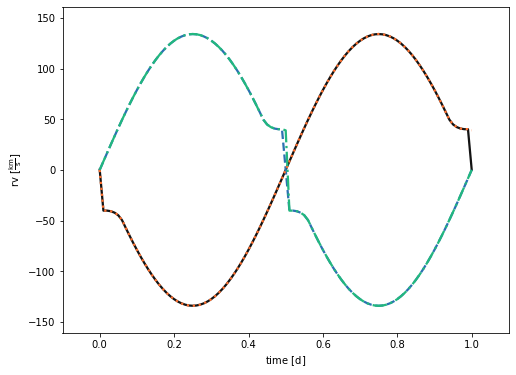

In [9]:
_ = b.plot(context='model', show=True)

In [10]:
b.set_value('yaw', component='primary', value=30)
b.set_value('yaw', component='secondary', value=50)

In [11]:
b.run_compute(kind='phoebe', irrad_method='none', model='phoebe2_misaligned')

<ParameterSet: 5 parameters | components: primary, secondary>

In [12]:
b.run_compute(kind='ellc', model='ellc_misaligned', distortion_method='sphere')

<ParameterSet: 5 parameters | components: primary, secondary>

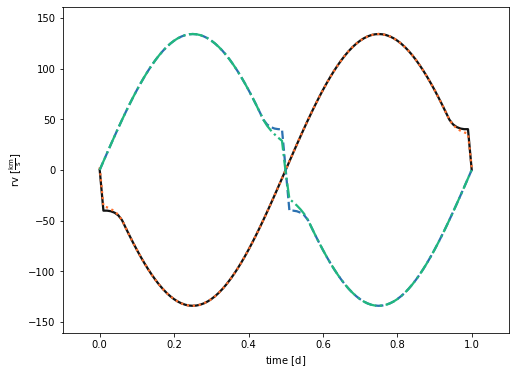

In [14]:
_ = b.plot(context='model', model=['phoebe2_aligned', 'phoebe2_misaligned'], show=True)

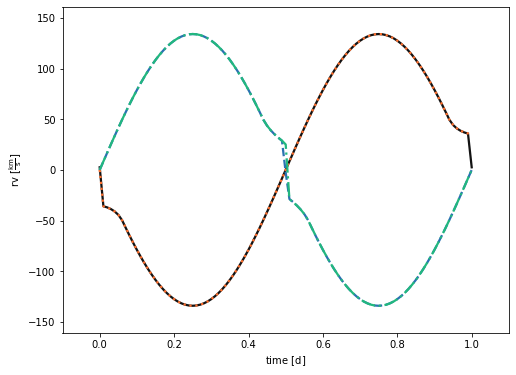

In [13]:
_ = b.plot(context='model', model=['phoebe2_misaligned', 'ellc_misaligned'], show=True)